# 1. 전처리

In [199]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [200]:
#실거래가
real = pd.read_csv('./data/seoul_data.csv')
#세권
bank = pd.read_csv('./data/loc/bank.csv')
cafe = pd.read_csv('./data/loc/cafe.csv')
conv = pd.read_csv('./data/loc/convenience.csv')
daiso = pd.read_csv('./data/loc/daiso.csv')
depart = pd.read_csv('./data/loc/depart.csv')
hamb = pd.read_csv('./data/loc/hamburger.csv')
hospital = pd.read_csv('./data/loc/hospital.csv')
mart = pd.read_csv('./data/loc/mart.csv')
park = pd.read_csv('./data/loc/park.csv')
police = pd.read_csv('./data/loc/police.csv')
restaurant = pd.read_csv('./data/loc/restaurant.csv')
riverpark = pd.read_csv('./data/loc/riverpark.csv')
school = pd.read_csv('./data/loc/school.csv')
starbucks = pd.read_csv('./data/loc/starbucks.csv')
subway = pd.read_csv('./data/loc/subway.csv')
#고도
elev = pd.read_csv('./data/lat_lon_alti.csv')


In [201]:
tmp = pd.merge(real,bank,left_on='위치',right_on='0')
tmp
tmp = tmp.drop(labels='min_distance',axis=1)
tmp = tmp.drop(labels='500m_count',axis=1)


In [202]:
df = pd.DataFrame()
df['loc'] = tmp['위치']
df['area'] = tmp['면적']
df['m_rental'] = tmp['전월세']
df['y_price'] = tmp['보증금']
df['m_price'] = tmp['월세']
df['floor'] = tmp['층']
df['year'] = tmp['건축년도']
df['rowhouse'] = tmp['type']




In [203]:
def changemax(num):
    if num == 10000:
        return np.nan
    else:
        return num

def maxmin_d(num, tmp_min, tmp_max):
    if num == np.nan:
        return 0
    else:
        return 1.0 - (num - tmp_min)/(tmp_max - tmp_min)

def minmax_c(num, tmp_min, tmp_max):
    return (num - tmp_min)/(tmp_max - tmp_min)

def inputlist(list1, string_d, string_c):
    
    
    tmp1 = pd.merge(tmp,list1,left_on='위치',right_on='0')
    tmp_list_d = list(map(changemax,tmp1['min_distance']))
    tmp_max = 500
    tmp_min = 500
    for i in tmp_list_d:
        if tmp_max < i:
            tmp_max = i
        if tmp_min > i:
            tmp_min = i
    if tmp_max == 500 or tmp_min == 500:
        print("error")
    tmp_list_d2=[]
    for i in tmp_list_d:
        tmp_list_d2.append(maxmin_d(i, tmp_min, tmp_max))
    

    tmp_list_c = tmp1['500m_count']
    tmp_max = max(tmp_list_c)
    tmp_min = min(tmp_list_c)
    tmp_list_c2 = []
    for i in tmp_list_c:
        tmp_list_c2.append(minmax_c(i,tmp_min,tmp_max))    
    
    df[string_d] = tmp_list_d2
    df[string_c] = tmp_list_c2



In [204]:
# bank['min_distance'] = list(map(changemax,subway['min_distance']))
# cafe['min_distance'] = list(map(changemax,subway['min_distance']))
# conv['min_distance'] = list(map(changemax,subway['min_distance']))
# daiso['min_distance'] = list(map(changemax,subway['min_distance']))
# hamb['min_distance'] = list(map(changemax,subway['min_distance']))
# hospital['min_distance'] = list(map(changemax,subway['min_distance']))
# mart['min_distance'] = list(map(changemax,subway['min_distance']))
# park['min_distance'] = list(map(changemax,subway['min_distance']))
# police['min_distance'] = list(map(changemax,subway['min_distance']))
# restaurant['min_distance'] = list(map(changemax,subway['min_distance']))
# riverpark['min_distance'] = list(map(changemax,subway['min_distance']))
# school['min_distance'] = list(map(changemax,subway['min_distance']))
# starbucks['min_distance'] = list(map(changemax,subway['min_distance']))
# subway['min_distance'] = list(map(changemax,subway['min_distance']))

In [205]:
inputlist(bank, 'bank_d', 'bank_c')
inputlist(cafe, 'cafe_d', 'cafe_c')
inputlist(conv, 'conv_d', 'conv_c')
inputlist(daiso, 'daiso_d', 'daiso_c')
inputlist(hamb, 'hamb_d', 'hamb_c')
inputlist(hospital, 'hosp_d', 'hosp_c')
inputlist(mart, 'mart_d', 'mart_c')
inputlist(park, 'park_d', 'park_c')
inputlist(police, 'police_d', 'police_c')
inputlist(restaurant, 'rest_d', 'rest_c')
inputlist(riverpark, 'rpark_d', 'rpark_c')
inputlist(school, 'sch_d', 'sch_c')
inputlist(starbucks, 'star_d', 'star_c')
inputlist(subway, 'sub_d', 'sub_c')



In [161]:
df = df.replace(np.nan, 0)

In [162]:
df.head(50)

,loc,area,m_rental,y_price,m_price,floor,year,rowhouse,bank_d,bank_c,cafe_d,cafe_c,conv_d,conv_c,daiso_d,daiso_c,hamb_d,hamb_c,hosp_d,hosp_c,mart_d,mart_c,park_d,park_c,police_d,police_c,rest_d,rest_c,rpark_d,rpark_c,sch_d,sch_c,star_d,star_c,sub_d,sub_c
0,서울특별시 강남구 개포동 1163-4,13.56,1,3000.0,40.0,4,2013.0,0,0.661829,0.533333,0.876596,0.400000,0.903546,0.933333,0.000000,0.0,0.638639,0.066667,0.804238,0.466667,0.348932,0.0,0.814329,0.500000,0.178788,0.0,0.811153,0.200000,0.0,0.0,0.583851,0.250000,0.233,0.000000,0.000000,0.000000
1,서울특별시 강남구 개포동 1163-4,21.88,0,16000.0,0.0,3,2013.0,0,0.661829,0.533333,0.876596,0.400000,0.903546,0.933333,0.000000,0.0,0.638639,0.066667,0.804238,0.466667,0.348932,0.0,0.814329,0.500000,0.178788,0.0,0.811153,0.200000,0.0,0.0,0.583851,0.250000,0.233,0.000000,0.000000,0.000000
2,서울특별시 강남구 개포동 1163-4,21.88,0,16000.0,0.0,2,2013.0,0,0.661829,0.533333,0.876596,0.400000,0.903546,0.933333,0.000000,0.0,0.638639,0.066667,0.804238,0.466667,0.348932,0.0,0.814329,0.500000,0.178788,0.0,0.811153,0.200000,0.0,0.0,0.583851,0.250000,0.233,0.000000,0.000000,0.000000
3,서울특별시 강남구 개포동 1163-4,21.88,0,16000.0,0.0,5,2013.0,0,0.661829,0.533333,0.876596,0.400000,0.903546,0.933333,0.000000,0.0,0.638639,0.066667,0.804238,0.466667,0.348932,0.0,0.814329,0.500000,0.178788,0.0,0.811153,0.200000,0.0,0.0,0.583851,0.250000,0.233,0.000000,0.000000,0.000000
4,서울특별시 강남구 개포동 1163-4,21.88,0,16000.0,0.0,4,2013.0,0,0.661829,0.533333,0.876596,0.400000,0.903546,0.933333,0.000000,0.0,0.638639,0.066667,0.804238,0.466667,0.348932,0.0,0.814329,0.500000,0.178788,0.0,0.811153,0.200000,0.0,0.0,0.583851,0.250000,0.233,0.000000,0.000000,0.000000
5,서울특별시 강남구 개포동 1164-27,51.78,0,60000.0,0.0,6,2016.0,0,0.685051,0.133333,0.870922,0.333333,0.758865,0.466667,0.000000,0.0,0.438438,0.000000,0.728557,0.066667,0.000000,0.0,0.883956,0.250000,0.328283,0.0,0.766793,0.200000,0.0,0.0,0.741201,0.250000,0.050,0.000000,0.000000,0.000000
6,서울특별시 강남구 개포동 1164-27,51.78,0,60000.0,0.0,6,2016.0,0,0.685051,0.133333,0.870922,0.333333,0.758865,0.466667,0.000000,0.0,0.438438,0.000000,0.728557,0.066667,0.000000,0.0,0.883956,0.250000,0.328283,0.0,0.766793,0.200000,0.0,0.0,0.741201,0.250000,0.050,0.000000,0.000000,0.000000
7,서울특별시 강남구 개포동 1164-27,51.78,0,58000.0,0.0,4,2016.0,0,0.685051,0.133333,0.870922,0.333333,0.758865,0.466667,0.000000,0.0,0.438438,0.000000,0.728557,0.066667,0.000000,0.0,0.883956,0.250000,0.328283,0.0,0.766793,0.200000,0.0,0.0,0.741201,0.250000,0.050,0.000000,0.000000,0.000000
8,서울특별시 강남구 개포동 1164-27,51.78,0,58000.0,0.0,4,2016.0,0,0.685051,0.133333,0.870922,0.333333,0.758865,0.466667,0.000000,0.0,0.438438,0.000000,0.728557,0.066667,0.000000,0.0,0.883956,0.250000,0.328283,0.0,0.766793,0.200000,0.0,0.0,0.741201,0.250000,0.050,0.000000,0.000000,0.000000
9,서울특별시 강남구 개포동 1164-27,51.78,1,50000.0,6.0,4,2016.0,0,0.685051,0.133333,0.870922,0.333333,0.758865,0.466667,0.000000,0.0,0.438438,0.000000,0.728557,0.066667,0.000000,0.0,0.883956,0.250000,0.328283,0.0,0.766793,0.200000,0.0,0.0,0.741201,0.250000,0.050,0.000000,0.000000,0.000000


In [163]:
tmp = pd.merge(real,elev,left_on='위치',right_on='0')

In [164]:
def minmax_c(num):
    return (num - tmp_min)/(tmp_max - tmp_min)

tmp_list = tmp['alti']
tmp_min = min(tmp_list)
tmp_max = max(tmp_list)

df['alti'] = list(map(minmax_c,tmp_list))

In [165]:
list_loc = df['loc']


In [166]:
def dong_split(string):
    split_list = string.split(' ')
    return(split_list[2])
    

In [167]:
df['dong'] = list(map(dong_split,list_loc))

In [168]:
df.head(3)

,loc,area,m_rental,y_price,m_price,floor,year,rowhouse,bank_d,bank_c,cafe_d,cafe_c,conv_d,conv_c,daiso_d,daiso_c,hamb_d,hamb_c,hosp_d,hosp_c,mart_d,mart_c,park_d,park_c,police_d,police_c,rest_d,rest_c,rpark_d,rpark_c,sch_d,sch_c,star_d,star_c,sub_d,sub_c,alti,dong
0,서울특별시 강남구 개포동 1163-4,13.56,1,3000.0,40.0,4,2013.0,0,0.661829,0.533333,0.876596,0.4,0.903546,0.933333,0.0,0.0,0.638639,0.066667,0.804238,0.466667,0.348932,0.0,0.814329,0.5,0.178788,0.0,0.811153,0.2,0.0,0.0,0.583851,0.25,0.233,0.0,0.0,0.0,0.060413,개포동
1,서울특별시 강남구 개포동 1163-4,21.88,0,16000.0,0.0,3,2013.0,0,0.661829,0.533333,0.876596,0.4,0.903546,0.933333,0.0,0.0,0.638639,0.066667,0.804238,0.466667,0.348932,0.0,0.814329,0.5,0.178788,0.0,0.811153,0.2,0.0,0.0,0.583851,0.25,0.233,0.0,0.0,0.0,0.060413,개포동
2,서울특별시 강남구 개포동 1163-4,21.88,0,16000.0,0.0,2,2013.0,0,0.661829,0.533333,0.876596,0.4,0.903546,0.933333,0.0,0.0,0.638639,0.066667,0.804238,0.466667,0.348932,0.0,0.814329,0.5,0.178788,0.0,0.811153,0.2,0.0,0.0,0.583851,0.25,0.233,0.0,0.0,0.0,0.060413,개포동


In [169]:
def year_split(string):
    
    year = str(string)[:4]
    return(int(year)-1963)

In [170]:
list_year = list(map(year_split,df['year']))

In [171]:
tmp_min = min(list_year)
tmp_max = max(list_year)

df['year'] = list(map(minmax_c,list_year))

tmp_list = df['area']
tmp_min = min(tmp_list)
tmp_max = max(tmp_list)

df['area'] = list(map(minmax_c,tmp_list))


In [172]:
df['price'] = df['y_price'] + df['m_price']/4*1000        #전월세전환율 서울시 4.8%

In [173]:
df.head(2)

,loc,area,m_rental,y_price,m_price,floor,year,rowhouse,bank_d,bank_c,cafe_d,cafe_c,conv_d,conv_c,daiso_d,daiso_c,hamb_d,hamb_c,hosp_d,hosp_c,mart_d,mart_c,park_d,park_c,police_d,police_c,rest_d,rest_c,rpark_d,rpark_c,sch_d,sch_c,star_d,star_c,sub_d,sub_c,alti,dong,price
0,서울특별시 강남구 개포동 1163-4,0.033698,1,3000.0,40.0,4,0.863636,0,0.661829,0.533333,0.876596,0.4,0.903546,0.933333,0.0,0.0,0.638639,0.066667,0.804238,0.466667,0.348932,0.0,0.814329,0.5,0.178788,0.0,0.811153,0.2,0.0,0.0,0.583851,0.25,0.233,0.0,0.0,0.0,0.060413,개포동,13000.0
1,서울특별시 강남구 개포동 1163-4,0.061294,0,16000.0,0.0,3,0.863636,0,0.661829,0.533333,0.876596,0.4,0.903546,0.933333,0.0,0.0,0.638639,0.066667,0.804238,0.466667,0.348932,0.0,0.814329,0.5,0.178788,0.0,0.811153,0.2,0.0,0.0,0.583851,0.25,0.233,0.0,0.0,0.0,0.060413,개포동,16000.0


In [174]:
df.to_csv('./data/final_seoul.csv', index=False)


# 2. 회귀모델만들기
-----------------------------
##### _c : 높을수록 주변 시설 많은 것
##### _d : 높을수록 가까운것
##### alti : 높을수록 경사 가파른것


In [212]:
df = pd.read_csv('./data/final_seoul.csv')

In [213]:
#pd.set_option('display.max_rows',None)
#pd.options.display.max_rows = 60

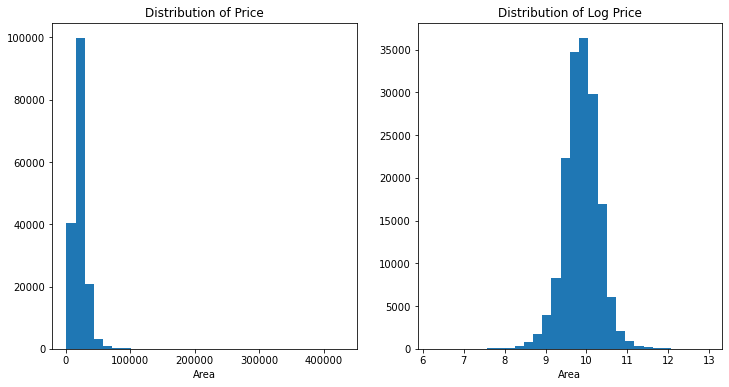

In [260]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))

ax1.hist(df['price'], bins=30)
ax1.set_title('Distribution of Price')
ax1.set_xlabel('Area')

ax2.hist(np.log1p(df['price']), bins=30)
ax2.set_title('Distribution of Log Price')
ax2.set_xlabel('Area')

plt.show()

In [215]:
df.columns

Index(['loc', 'area', 'm_rental', 'y_price', 'm_price', 'floor', 'year',
       'rowhouse', 'bank_d', 'bank_c', 'cafe_d', 'cafe_c', 'conv_d', 'conv_c',
       'daiso_d', 'daiso_c', 'hamb_d', 'hamb_c', 'hosp_d', 'hosp_c', 'mart_d',
       'mart_c', 'park_d', 'park_c', 'police_d', 'police_c', 'rest_d',
       'rest_c', 'rpark_d', 'rpark_c', 'sch_d', 'sch_c', 'star_d', 'star_c',
       'sub_d', 'sub_c', 'alti', 'dong', 'price'],
      dtype='object')

In [216]:
# 전월세여부, 단독주택여부, 동 은 one-hot coding

dfx = df[['area',  'year', 'bank_d', 'bank_c', 'cafe_d', 'cafe_c', 'conv_d', 'conv_c',
       'daiso_d', 'daiso_c', 'hamb_d', 'hamb_c', 'hosp_d', 'hosp_c', 'mart_d',
       'mart_c', 'park_d', 'park_c', 'police_d', 'police_c', 'rest_d',
       'rest_c', 'rpark_d', 'rpark_c', 'sch_d', 'sch_c', 'star_d', 'star_c',
          'sub_d', 'sub_c', 'alti']]
dfy = df['price']
dfy = np.log1p(dfy)

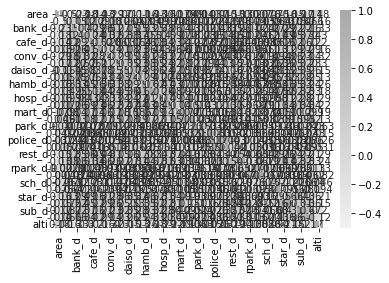

In [217]:
cmap = sns.light_palette("darkgray", as_cmap=True)
sns.heatmap(dfx.corr(), annot=True, cmap=cmap)
plt.show()

In [222]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# conv_d
# hos_d
# conv_c
# bank_d
dfx2 = df[['area',  'year',  'bank_c',  'cafe_c', 
       'daiso_d', 'daiso_c', 'hamb_c',  'hosp_c', 'mart_d',
       'mart_c',  'park_c', 'police_d', 'police_c',
       'rest_c', 'rpark_d', 'rpark_c', 'sch_d', 'sch_c', 'star_d', 'star_c',
           'sub_d','sub_c', 'alti']]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dfx2.values, i) for i in range(dfx2.shape[1])]
vif["features"] = dfx2.columns
vif

,VIF Factor,features
0,4.158239,area
1,24.581093,year
2,25.886482,bank_c
3,11.714740,cafe_c
4,10.263353,daiso_d
5,4.199339,daiso_c
6,5.467955,hamb_c
7,11.183007,hosp_c
8,5.865349,mart_d
9,3.450323,mart_c


In [223]:
dfx = dfx2
list_floor=df['floor'].astype(str)


In [224]:
df['m_rental']=df['m_rental'].astype(str)
df['floor']=df['floor'].astype(str)
df['rowhouse']=df['rowhouse'].astype(str)


df_tmp = pd.get_dummies(df[['m_rental', 'floor', 'dong','rowhouse']])

In [225]:
dfx = pd.concat([dfx, df_tmp], axis=1)

In [226]:
dfy

0         9.472782
1         9.680406
2         9.680406
3         9.680406
4         9.680406
            ...   
165438    9.228770
165439    9.413363
165440    9.510519
165441    9.350189
165442    9.392745
Name: price, Length: 165443, dtype: float64

In [227]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(dfx, dfy, test_size=0.3, random_state=34)

In [228]:
def RMSE(y, y_pred):
    rmse = mean_squared_error(y, y_pred) ** 0.5
    return rmse

def rmse_cv(model):
    # cv별로 학습하는 함수
    tscv = TimeSeriesSplit(n_splits=10)
    rmse_list = []
    model_name = model.__class__.__name__
    for _, (train_index, test_index) in tqdm(enumerate(tscv.split(train_X), start=1), desc=f'{model_name} Cross Validations...', total=10):
        X_train, X_test = train_X.iloc[train_index], train_X.iloc[test_index]
        y_train, y_test = train_y.iloc[train_index], train_y.iloc[test_index]
        clf = model.fit(X_train, y_train)
        pred = clf.predict(X_test)
        rmse = RMSE(y_test, pred) 
        rmse_list.append(rmse)
    return model_name, rmse_list

def print_rmse_score(model):
    # cv별 프린팅, 평균 저장
    model_name, score = rmse_cv(model)
    for i, r in enumerate(score, start=1):
        print(f'{i} FOLDS: {model_name} RMSLE: {r:.4f}')
    print(f'\n{model_name} mean RMSLE: {np.mean(score):.4f}')
    print('='*40)
    return model_name, np.mean(score)

In [229]:
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import  LabelEncoder
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
from tqdm import tqdm

In [230]:
reg = LinearRegression(n_jobs=-1)
ridge = Ridge(alpha=0.8, random_state=1)
lasso = Lasso(alpha = 0.01, random_state=1)
Enet = ElasticNet(alpha=0.03, l1_ratio=0.01, random_state=1)
DTree = DecisionTreeRegressor(max_depth=6, min_samples_split=10, min_samples_leaf=15, random_state=1)
rf = RandomForestRegressor(n_estimators=500, criterion='mse', max_depth=9, min_samples_split=50,
                           min_samples_leaf=5, random_state=1, n_jobs=-1)
model_xgb = xgb.XGBRegressor(n_estimators=500, max_depth=9, min_child_weight=5, gamma=0.1, n_jobs=-1)
model_lgb = lgb.LGBMRegressor(n_estimators=1159, max_depth=8, min_child_weight=5, n_jobs=-1)

In [192]:
models = []
scores = []
model_name, mean_score = print_rmse_score(DTree)
models.append(model_name)
scores.append(mean_score)

DecisionTreeRegressor Cross Validations...: 100%|██████████████████████████████████████| 10/10 [00:16<00:00,  1.65s/it]

1 FOLDS: DecisionTreeRegressor RMSLE: 0.3294
2 FOLDS: DecisionTreeRegressor RMSLE: 0.3223
3 FOLDS: DecisionTreeRegressor RMSLE: 0.3173
4 FOLDS: DecisionTreeRegressor RMSLE: 0.3338
5 FOLDS: DecisionTreeRegressor RMSLE: 0.3132
6 FOLDS: DecisionTreeRegressor RMSLE: 0.3131
7 FOLDS: DecisionTreeRegressor RMSLE: 0.3296
8 FOLDS: DecisionTreeRegressor RMSLE: 0.3153
9 FOLDS: DecisionTreeRegressor RMSLE: 0.3226
10 FOLDS: DecisionTreeRegressor RMSLE: 0.3209

DecisionTreeRegressor mean RMSLE: 0.3217


In [193]:
DT_fi = pd.DataFrame({'col' : train_X.columns, 'feature_importance' :DTree.feature_importances_})

<BarContainer object of 8 artists>

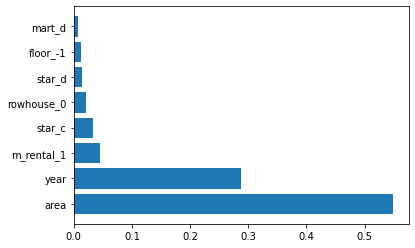

In [210]:
DT_fi_s = DT_fi.sort_values(by=['feature_importance'], ascending = False)
plt.barh(DT_fi_s['col'][:8], DT_fi_s['feature_importance'][:8])

In [231]:
models = []
scores = []
for model in [reg, ridge, lasso, Enet, DTree, rf, model_xgb, model_lgb]:
    model_name, mean_score = print_rmse_score(model)
    models.append(model_name)
    scores.append(mean_score)

LinearRegression Cross Validations...: 100%|███████████████████████████████████████████| 10/10 [00:10<00:00,  1.03s/it]


1 FOLDS: LinearRegression RMSLE: 13441057570.8822
2 FOLDS: LinearRegression RMSLE: 7568347644.2606
3 FOLDS: LinearRegression RMSLE: 134110449.1720
4 FOLDS: LinearRegression RMSLE: 284350906.6323
5 FOLDS: LinearRegression RMSLE: 12225418.3928
6 FOLDS: LinearRegression RMSLE: 200993.0854
7 FOLDS: LinearRegression RMSLE: 8855562.9596
8 FOLDS: LinearRegression RMSLE: 47837983.7961
9 FOLDS: LinearRegression RMSLE: 81076443.7323
10 FOLDS: LinearRegression RMSLE: 3247262.6274

LinearRegression mean RMSLE: 2158131023.5541


Ridge Cross Validations...: 100%|██████████████████████████████████████████████████████| 10/10 [00:05<00:00,  1.80it/s]


1 FOLDS: Ridge RMSLE: 0.3056
2 FOLDS: Ridge RMSLE: 0.3027
3 FOLDS: Ridge RMSLE: 0.3027
4 FOLDS: Ridge RMSLE: 0.3113
5 FOLDS: Ridge RMSLE: 0.2946
6 FOLDS: Ridge RMSLE: 0.2959
7 FOLDS: Ridge RMSLE: 0.3111
8 FOLDS: Ridge RMSLE: 0.2982
9 FOLDS: Ridge RMSLE: 0.3006
10 FOLDS: Ridge RMSLE: 0.3001

Ridge mean RMSLE: 0.3023


Lasso Cross Validations...: 100%|██████████████████████████████████████████████████████| 10/10 [00:06<00:00,  1.59it/s]


1 FOLDS: Lasso RMSLE: 0.4062
2 FOLDS: Lasso RMSLE: 0.4033
3 FOLDS: Lasso RMSLE: 0.4071
4 FOLDS: Lasso RMSLE: 0.4217
5 FOLDS: Lasso RMSLE: 0.4073
6 FOLDS: Lasso RMSLE: 0.4136
7 FOLDS: Lasso RMSLE: 0.4277
8 FOLDS: Lasso RMSLE: 0.4141
9 FOLDS: Lasso RMSLE: 0.4156
10 FOLDS: Lasso RMSLE: 0.4195

Lasso mean RMSLE: 0.4136


ElasticNet Cross Validations...: 100%|█████████████████████████████████████████████████| 10/10 [00:07<00:00,  1.31it/s]


1 FOLDS: ElasticNet RMSLE: 0.3941
2 FOLDS: ElasticNet RMSLE: 0.3881
3 FOLDS: ElasticNet RMSLE: 0.3887
4 FOLDS: ElasticNet RMSLE: 0.4011
5 FOLDS: ElasticNet RMSLE: 0.3884
6 FOLDS: ElasticNet RMSLE: 0.3913
7 FOLDS: ElasticNet RMSLE: 0.4069
8 FOLDS: ElasticNet RMSLE: 0.3942
9 FOLDS: ElasticNet RMSLE: 0.3965
10 FOLDS: ElasticNet RMSLE: 0.3996

ElasticNet mean RMSLE: 0.3949


DecisionTreeRegressor Cross Validations...: 100%|██████████████████████████████████████| 10/10 [00:12<00:00,  1.21s/it]


1 FOLDS: DecisionTreeRegressor RMSLE: 0.3276
2 FOLDS: DecisionTreeRegressor RMSLE: 0.3225
3 FOLDS: DecisionTreeRegressor RMSLE: 0.3171
4 FOLDS: DecisionTreeRegressor RMSLE: 0.3339
5 FOLDS: DecisionTreeRegressor RMSLE: 0.3134
6 FOLDS: DecisionTreeRegressor RMSLE: 0.3130
7 FOLDS: DecisionTreeRegressor RMSLE: 0.3293
8 FOLDS: DecisionTreeRegressor RMSLE: 0.3153
9 FOLDS: DecisionTreeRegressor RMSLE: 0.3226
10 FOLDS: DecisionTreeRegressor RMSLE: 0.3209

DecisionTreeRegressor mean RMSLE: 0.3216


RandomForestRegressor Cross Validations...:   0%|                                               | 0/10 [00:00<?, ?it/s]C:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
RandomForestRegressor Cross Validations...:  10%|███▉                                   | 1/10 [00:11<01:40, 11.16s/it]C:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
RandomForestRegressor Cross Validations...:  20%|███████▊                               | 2/10 [00:40<02:53, 21.69s/it]C:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
R

1 FOLDS: RandomForestRegressor RMSLE: 0.2969
2 FOLDS: RandomForestRegressor RMSLE: 0.2914
3 FOLDS: RandomForestRegressor RMSLE: 0.2869
4 FOLDS: RandomForestRegressor RMSLE: 0.2992
5 FOLDS: RandomForestRegressor RMSLE: 0.2794
6 FOLDS: RandomForestRegressor RMSLE: 0.2821
7 FOLDS: RandomForestRegressor RMSLE: 0.2947
8 FOLDS: RandomForestRegressor RMSLE: 0.2831
9 FOLDS: RandomForestRegressor RMSLE: 0.2875
10 FOLDS: RandomForestRegressor RMSLE: 0.2895

RandomForestRegressor mean RMSLE: 0.2891


XGBRegressor Cross Validations...:   0%|                                                        | 0/10 [00:00<?, ?it/s]C:\anaconda\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
XGBRegressor Cross Validations...:  10%|████▊                                           | 1/10 [00:30<04:38, 30.96s/it]C:\anaconda\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
XGBRegressor Cross Validations...:  20%|█████████▌                                      | 2/10 [01:29<06:16, 47.02s/it]C:\anaconda\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and wil

1 FOLDS: XGBRegressor RMSLE: 0.2776
2 FOLDS: XGBRegressor RMSLE: 0.2599
3 FOLDS: XGBRegressor RMSLE: 0.2567
4 FOLDS: XGBRegressor RMSLE: 0.2586
5 FOLDS: XGBRegressor RMSLE: 0.2365
6 FOLDS: XGBRegressor RMSLE: 0.2340
7 FOLDS: XGBRegressor RMSLE: 0.2478
8 FOLDS: XGBRegressor RMSLE: 0.2329
9 FOLDS: XGBRegressor RMSLE: 0.2340
10 FOLDS: XGBRegressor RMSLE: 0.2318

XGBRegressor mean RMSLE: 0.2470


LGBMRegressor Cross Validations...: 100%|██████████████████████████████████████████████| 10/10 [00:39<00:00,  3.91s/it]

1 FOLDS: LGBMRegressor RMSLE: 0.2724
2 FOLDS: LGBMRegressor RMSLE: 0.2544
3 FOLDS: LGBMRegressor RMSLE: 0.2508
4 FOLDS: LGBMRegressor RMSLE: 0.2548
5 FOLDS: LGBMRegressor RMSLE: 0.2318
6 FOLDS: LGBMRegressor RMSLE: 0.2337
7 FOLDS: LGBMRegressor RMSLE: 0.2467
8 FOLDS: LGBMRegressor RMSLE: 0.2321
9 FOLDS: LGBMRegressor RMSLE: 0.2335
10 FOLDS: LGBMRegressor RMSLE: 0.2337

LGBMRegressor mean RMSLE: 0.2444


In [233]:
result_df = pd.DataFrame({'Model': models, 'Score': scores}).reset_index(drop=True)
result_df

,Model,Score
0,LinearRegression,2.158131e+09
1,Ridge,3.022815e-01
2,Lasso,4.136161e-01
3,ElasticNet,3.948756e-01
4,DecisionTreeRegressor,3.215584e-01
5,RandomForestRegressor,2.890840e-01
6,XGBRegressor,2.469768e-01
7,LGBMRegressor,2.443951e-01


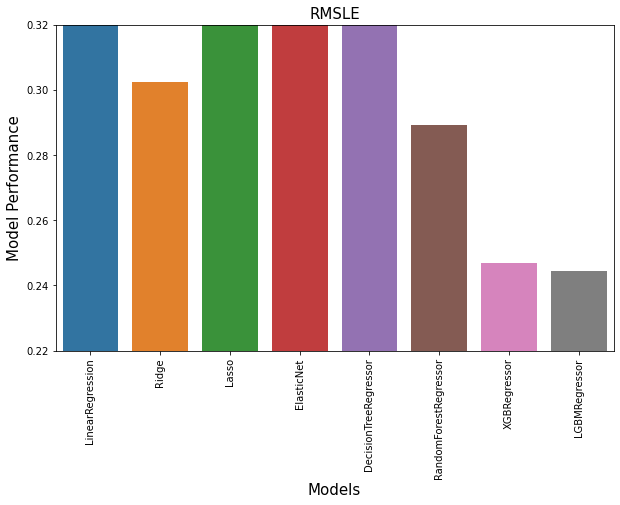

In [234]:
f, ax = plt.subplots(figsize=(10, 6))
plt.xticks(rotation='90')
sns.barplot(x=result_df['Model'], y=result_df['Score'])
plt.xlabel('Models', fontsize=15)
plt.ylabel('Model Performance', fontsize=15)
plt.ylim(0.22, 0.32)
plt.title('RMSLE', fontsize=15)
plt.show()

In [235]:
# 낮을수록 좋은거임

In [236]:
cut = int(len(dfx)*0.8)
h_train_X = dfx[:cut]
h_valid_X = dfx[cut:]
h_train_y = dfy[:cut]
h_valid_y = dfy[cut:]


print(h_train_X.shape, h_train_y.shape, h_valid_X.shape, h_valid_y.shape)

(132354, 438) (132354,) (33089, 438) (33089,)


In [237]:
h_train_X.head()

,area,year,bank_c,cafe_c,daiso_d,daiso_c,hamb_c,hosp_c,mart_d,mart_c,park_c,police_d,police_c,rest_c,rpark_d,rpark_c,sch_d,sch_c,star_d,star_c,sub_d,sub_c,alti,m_rental_0,m_rental_1,floor_-1,floor_-2,floor_1,floor_10,floor_11,floor_12,floor_13,floor_14,floor_15,floor_16,floor_17,floor_18,floor_19,floor_2,floor_20,floor_21,floor_22,floor_23,floor_24,floor_25,floor_26,floor_27,floor_28,floor_29,floor_3,floor_30,floor_31,floor_32,floor_33,floor_34,floor_35,floor_36,floor_37,floor_38,floor_39,floor_4,floor_41,floor_43,floor_44,floor_45,floor_49,floor_5,floor_6,floor_7,floor_8,floor_9,dong_가락동,dong_가리봉동,dong_가산동,dong_가양동,dong_가회동,dong_갈월동,dong_갈현동,dong_강일동,dong_개봉동,dong_개포동,dong_개화동,dong_거여동,dong_경운동,dong_계동,dong_고덕동,dong_고척동,dong_공덕동,dong_공릉동,dong_공항동,dong_관수동,dong_관철동,dong_광장동,dong_광희동1가,dong_광희동2가,dong_교북동,dong_구기동,dong_구로동,dong_구산동,dong_구수동,dong_구의동,dong_군자동,dong_궁동,dong_금호동1가,dong_금호동2가,dong_금호동3가,dong_금호동4가,dong_길동,dong_길음동,dong_낙원동,dong_남가좌동,dong_남영동,dong_남창동,dong_남현동,dong_내곡동,dong_내발산동,dong_내수동,dong_냉천동,dong_노고산동,dong_노량진동,dong_녹번동,dong_논현동,dong_누상동,dong_누하동,dong_능동,dong_답십리동,dong_당산동,dong_당산동1가,dong_당산동2가,dong_당산동3가,dong_당산동4가,dong_당산동5가,dong_당산동6가,dong_당인동,dong_대림동,dong_대방동,dong_대신동,dong_대조동,dong_대치동,dong_대현동,dong_대흥동,dong_도곡동,dong_도림동,dong_도봉동,dong_도선동,dong_도원동,dong_도화동,dong_독산동,dong_돈암동,dong_동교동,dong_동빙고동,dong_동선동1가,dong_동선동2가,dong_동선동3가,dong_동선동4가,dong_동선동5가,dong_동소문동1가,dong_동소문동3가,dong_동소문동4가,dong_동소문동6가,dong_동소문동7가,dong_동숭동,dong_동자동,dong_동작동,dong_둔촌동,dong_등촌동,dong_마곡동,dong_마장동,dong_마천동,dong_마포동,dong_만리동1가,dong_만리동2가,dong_망우동,dong_망원동,dong_면목동,dong_명륜1가,dong_명륜2가,dong_명륜3가,dong_명륜4가,dong_명일동,dong_목동,dong_무악동,dong_무학동,dong_묵동,dong_묵정동,dong_문래동3가,dong_문래동5가,dong_문래동6가,dong_문배동,dong_문정동,dong_미근동,dong_미아동,dong_반포동,dong_방배동,dong_방이동,dong_방학동,dong_방화동,dong_번동,dong_보광동,dong_보문동1가,dong_보문동2가,dong_보문동3가,dong_보문동4가,dong_보문동5가,dong_보문동6가,dong_보문동7가,dong_본동,dong_봉천동,dong_부암동,dong_북가좌동,dong_북아현동,dong_불광동,dong_사근동,dong_사당동,dong_사직동,dong_산천동,dong_삼선동1가,dong_삼선동2가,dong_삼선동3가,dong_삼선동4가,dong_삼선동5가,dong_삼성동,dong_삼전동,dong_상계동,dong_상도1동,dong_상도동,dong_상봉동,dong_상수동,dong_상암동,dong_상왕십리동,dong_상월곡동,dong_상일동,dong_서계동,dong_서교동,dong_서빙고동,dong_서초동,dong_석관동,dong_석촌동,dong_성내동,dong_성북동,dong_성북동1가,dong_성산동,dong_성수동1가,dong_성수동2가,dong_세곡동,dong_송정동,dong_송파동,dong_수색동,dong_수서동,dong_수송동,dong_수유동,dong_순화동,dong_숭인동,dong_시흥동,dong_신계동,dong_신공덕동,dong_신교동,dong_신길동,dong_신내동,dong_신당동,dong_신대방동,dong_신도림동,dong_신림동,dong_신문로2가,dong_신사동,dong_신설동,dong_신수동,dong_신영동,dong_신원동,dong_신월동,dong_신정동,dong_신창동,dong_신천동,dong_신촌동,dong_쌍림동,dong_쌍문동,dong_아현동,dong_안국동,dong_안암동1가,dong_안암동2가,dong_안암동3가,dong_안암동4가,dong_안암동5가,dong_암사동,dong_양재동,dong_양평동1가,dong_양평동2가,dong_양평동3가,dong_양평동4가,dong_양평동5가,dong_양평동6가,dong_여의도동,dong_역삼동,dong_역촌동,dong_연건동,dong_연남동,dong_연지동,dong_연희동,dong_염곡동,dong_염리동,dong_염창동,dong_영등포동,dong_영등포동1가,dong_영등포동2가,dong_영등포동3가,dong_영등포동4가,dong_영등포동5가,dong_영등포동6가,dong_영등포동7가,dong_영등포동8가,dong_영천동,dong_예장동,dong_오금동,dong_오류동,dong_오장동,dong_옥수동,dong_옥인동,dong_옥천동,dong_온수동,dong_외발산동,dong_용강동,dong_용답동,dong_용두동,dong_용문동,dong_용산동2가,dong_용산동3가,dong_용산동5가,dong_우면동,dong_우이동,dong_운니동,dong_원남동,dong_원서동,dong_원지동,dong_원효로1가,dong_원효로2가,dong_원효로3가,dong_원효로4가,dong_월계동,dong_율현동,dong_을지로4가,dong_을지로5가,dong_을지로6가,dong_응봉동,dong_응암동,dong_의주로1가,dong_이문동,dong_이촌동,dong_이태원동,dong_이화동,dong_익선동,dong_인의동,dong_일원동,dong_자곡동,dong_자양동,dong_잠실동,dong_잠원동,dong_장안동,dong_장위동,dong_장충동1가,dong_장충동2가,dong_저동2가,dong_전농동,dong_정릉동,dong_제기동,dong_종로1가,dong_종로6가,dong_종암동,dong_주성동,dong_중계동,dong_중곡동,dong_중동,dong_중림동,dong_중화동,dong_증산동,dong_진관동,dong_창동,dong_창신동,dong_창전동,dong_창천동,dong_천연동,dong_천왕동,dong_천호동,dong_청담동,dong_청량리동,dong_청운동,dong_청파동1가,dong_청파동2가,dong_청파동3가,dong_체부동,dong_충무로2가,dong_충무로3가,dong_충무로5가,dong_충신동,dong_충정로2가,dong_충정로3가,dong_토정동,dong_통의동,dong_통인동,dong_평창동,dong_풍납동,dong_필동1가,dong_필동2가,dong_필동3가,dong_필운동,dong_하계동,dong_하왕십리동,dong_하월곡동,dong_하중동,dong_한강로1가,dong_한강로2가,dong_한강로3가,dong_한남동,dong_합동,dong_합정동,dong_항동,dong_행당동,dong_행촌동,dong_현석동,dong_혜화동,dong_홍은동,dong_홍익동,dong_홍제동,dong_홍지동,dong_화곡동,dong_화양동,dong_황학동,dong_회기동,d

In [238]:
from optuna.samplers import TPESampler
import optuna

sampler = TPESampler(seed=10)

def objective(trial):
    dtrain = lgb.Dataset(h_train_X, label=h_train_y)
    dtest = lgb.Dataset(h_valid_X, label=h_valid_y)

    param = {
        'objective': 'regression', # 회귀
        'verbose': -1,
        'metric': 'rmse', 
        'max_depth': trial.suggest_int('max_depth',3, 15),
        'learning_rate': trial.suggest_loguniform("learning_rate", 1e-8, 1e-2),
        'n_estimators': trial.suggest_int('n_estimators', 100, 3000),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_loguniform('subsample', 0.4, 1),
    }

    model = lgb.LGBMRegressor(**param)
    lgb_model = model.fit(h_train_X, h_train_y, eval_set=[(h_valid_X, h_valid_y)], verbose=0, early_stopping_rounds=25)
    rmse = RMSE(h_valid_y, lgb_model.predict(h_valid_X))
    return rmse
        
study_lgb = optuna.create_study(direction='minimize', sampler=sampler)
study_lgb.optimize(objective, n_trials=100)

[I 2022-05-31 00:24:15,713] A new study created in memory with name: no-name-8cb78161-040e-42af-ba6e-f7c92593d8c0
C:\anaconda\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\anaconda\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2022-05-31 00:24:31,409] Trial 0 finished with value: 0.38204445085828953 and parameters: {'max_depth': 13, 'learning_rate': 1.3320229150659043e-08, 'n_estimators': 1938, 'min_child_samples': 76, 'subsampl

[I 2022-05-31 00:25:59,252] Trial 8 finished with value: 0.30701688903997465 and parameters: {'max_depth': 10, 'learning_rate': 0.0008236106883720722, 'n_estimators': 677, 'min_child_samples': 87, 'subsample': 0.5520731753100153}. Best is trial 2 with value: 0.3046596152689663.
C:\anaconda\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\anaconda\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2022-05-31 00:26:23,661] Trial 9 finishe

[I 2022-05-31 00:27:08,269] Trial 17 finished with value: 0.3607712500925379 and parameters: {'max_depth': 5, 'learning_rate': 6.790663195577422e-05, 'n_estimators': 1867, 'min_child_samples': 79, 'subsample': 0.8454918854124668}. Best is trial 15 with value: 0.25488706733127064.
C:\anaconda\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\anaconda\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2022-05-31 00:27:15,875] Trial 18 fini

[I 2022-05-31 00:28:41,188] Trial 26 finished with value: 0.32482063295001207 and parameters: {'max_depth': 9, 'learning_rate': 0.0002724958131906515, 'n_estimators': 1409, 'min_child_samples': 27, 'subsample': 0.6356852460428034}. Best is trial 25 with value: 0.2326181534965232.
C:\anaconda\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\anaconda\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2022-05-31 00:28:55,426] Trial 27 fini

[I 2022-05-31 00:30:58,785] Trial 35 finished with value: 0.2710641310625439 and parameters: {'max_depth': 14, 'learning_rate': 0.0003647539544663242, 'n_estimators': 2985, 'min_child_samples': 38, 'subsample': 0.4999287925662949}. Best is trial 34 with value: 0.22116016681017997.
C:\anaconda\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\anaconda\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2022-05-31 00:31:16,118] Trial 36 fin

[I 2022-05-31 00:33:13,101] Trial 44 finished with value: 0.23832291758830149 and parameters: {'max_depth': 12, 'learning_rate': 0.001081016593776515, 'n_estimators': 2466, 'min_child_samples': 15, 'subsample': 0.409800984014475}. Best is trial 39 with value: 0.2161872066175396.
C:\anaconda\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\anaconda\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2022-05-31 00:33:21,682] Trial 45 finis

[I 2022-05-31 00:35:44,497] Trial 53 finished with value: 0.21943038448436425 and parameters: {'max_depth': 11, 'learning_rate': 0.005827153706319195, 'n_estimators': 2068, 'min_child_samples': 19, 'subsample': 0.4028447709531339}. Best is trial 39 with value: 0.2161872066175396.
C:\anaconda\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\anaconda\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2022-05-31 00:36:01,594] Trial 54 fini

[I 2022-05-31 00:38:38,879] Trial 62 finished with value: 0.21732541601887037 and parameters: {'max_depth': 14, 'learning_rate': 0.0063829004460749066, 'n_estimators': 2544, 'min_child_samples': 15, 'subsample': 0.4179290217881748}. Best is trial 39 with value: 0.2161872066175396.
C:\anaconda\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\anaconda\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2022-05-31 00:38:53,653] Trial 63 fin

[I 2022-05-31 00:41:28,866] Trial 71 finished with value: 0.21689398081806566 and parameters: {'max_depth': 14, 'learning_rate': 0.006561782100730408, 'n_estimators': 2550, 'min_child_samples': 10, 'subsample': 0.45231329578358614}. Best is trial 39 with value: 0.2161872066175396.
C:\anaconda\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\anaconda\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2022-05-31 00:41:50,532] Trial 72 fin

[I 2022-05-31 00:44:17,502] Trial 80 finished with value: 0.2321553811018489 and parameters: {'max_depth': 10, 'learning_rate': 0.0015664909571377595, 'n_estimators': 2422, 'min_child_samples': 16, 'subsample': 0.4247629497525528}. Best is trial 39 with value: 0.2161872066175396.
C:\anaconda\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\anaconda\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2022-05-31 00:44:30,711] Trial 81 fini

[I 2022-05-31 00:46:45,877] Trial 89 finished with value: 0.381040016956028 and parameters: {'max_depth': 13, 'learning_rate': 2.457082854281789e-06, 'n_estimators': 2167, 'min_child_samples': 34, 'subsample': 0.4522164605393014}. Best is trial 39 with value: 0.2161872066175396.
C:\anaconda\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\anaconda\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2022-05-31 00:46:49,082] Trial 90 finis

[I 2022-05-31 00:49:20,946] Trial 98 finished with value: 0.21821487066912149 and parameters: {'max_depth': 14, 'learning_rate': 0.0039784633488591835, 'n_estimators': 2864, 'min_child_samples': 7, 'subsample': 0.41032298921756544}. Best is trial 39 with value: 0.2161872066175396.
C:\anaconda\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\anaconda\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2022-05-31 00:49:41,740] Trial 99 fin

In [239]:
trial = study_lgb.best_trial
trial_params = trial.params
print('Best Trial: score {},\nparams {}'.format(trial.value, trial_params))

Best Trial: score 0.2161872066175396,
params {'max_depth': 13, 'learning_rate': 0.005819820977678712, 'n_estimators': 2372, 'min_child_samples': 18, 'subsample': 0.40169990543257617}


In [240]:
final_lgb_model = lgb.LGBMRegressor(**trial_params)
final_lgb_model.fit(train_X, train_y)
final_lgb_pred = final_lgb_model.predict(test_X)

In [241]:
final_lgb_pred

array([ 9.90753388,  9.41184885,  9.68525687, ...,  9.72687521,
       10.3666867 ,  9.69559866])

<BarContainer object of 444 artists>

C:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46973 (\N{HANGUL SYLLABLE RAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49328 (\N

C:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50684 (\N{HANGUL SYLLABLE YEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50724 (\N{HANGUL SYLLABLE O}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47448 (\N{HANGUL SYLLABLE RYU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50725 (\N{HA

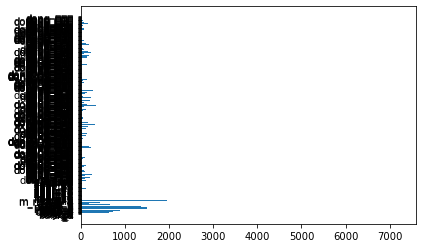

In [65]:
#plt.barh(train_X.columns, final_lgb_model.feature_importances_)

In [242]:
feature_importance = pd.DataFrame({'col' : train_X.columns, 'importance':final_lgb_model.feature_importances_})
feature_importance

,col,importance
0,area,8843
1,year,8066
2,bank_c,1028
3,cafe_c,695
4,daiso_d,1608
...,...,...
433,dong_휘경동,40
434,dong_흑석동,12
435,dong_흥인동,0
436,rowhouse_0,1184


In [243]:
f_i = feature_importance.sort_values(by=['importance'], axis=0,ascending=False)
f_i.head(50)

,col,importance
0,area,8843
1,year,8066
23,m_rental_0,2719
18,star_d,2663
20,sub_d,2302
22,alti,2056
8,mart_d,1989
11,police_d,1801
19,star_c,1729
4,daiso_d,1608


In [244]:
final_lgb_pred = final_lgb_model.predict(dfx)
final_pred_sub = np.expm1(final_lgb_pred)
final_pred_sub

array([13168.9401771 , 17222.95288378, 17071.71175923, ...,
       12029.48319293, 11418.07777559, 11231.22885554])

In [245]:
df2 = pd.DataFrame()
df2['loc'] = tmp['위치']
df2['area'] = tmp['면적']
df2['m_rental'] = tmp['전월세']
df2['y_price'] = tmp['보증금']
df2['m_price'] = tmp['월세']
df2['floor'] = tmp['층']
df2['year'] = tmp['건축년도']
df2['rowhouse'] = tmp['type']
df2['price'] = df2['y_price'] + df2['m_price']/4*1000        #전월세전환율 서울시 4.8%

In [246]:
df2['predict_price'] = final_pred_sub

In [247]:
df2.head(50)

,loc,area,m_rental,y_price,m_price,floor,year,rowhouse,price,predict_price
0,서울특별시 강남구 개포동 1163-4,13.56,1,3000.0,40.0,4,2013.0,0,13000.0,13168.940177
1,서울특별시 강남구 개포동 1163-4,21.88,0,16000.0,0.0,3,2013.0,0,16000.0,17222.952884
2,서울특별시 강남구 개포동 1163-4,21.88,0,16000.0,0.0,2,2013.0,0,16000.0,17071.711759
3,서울특별시 강남구 개포동 1163-4,21.88,0,16000.0,0.0,5,2013.0,0,16000.0,17224.234696
4,서울특별시 강남구 개포동 1163-4,21.88,0,16000.0,0.0,4,2013.0,0,16000.0,17533.688124
5,서울특별시 강남구 개포동 1164-27,51.78,0,60000.0,0.0,6,2016.0,0,60000.0,37087.024694
6,서울특별시 강남구 개포동 1164-27,51.78,0,60000.0,0.0,6,2016.0,0,60000.0,37087.024694
7,서울특별시 강남구 개포동 1164-27,51.78,0,58000.0,0.0,4,2016.0,0,58000.0,36094.034874
8,서울특별시 강남구 개포동 1164-27,51.78,0,58000.0,0.0,4,2016.0,0,58000.0,36094.034874
9,서울특별시 강남구 개포동 1164-27,51.78,1,50000.0,6.0,4,2016.0,0,51500.0,23919.263637


In [248]:
final_lgb_pred_test = final_lgb_model.predict(test_X)
final_pred_sub_test = np.expm1(final_lgb_pred_test)
final_pred_sub_test

array([20080.09056442, 12231.46606034, 16077.79923034, ...,
       16761.09230122, 31781.99572833, 16244.94561122])

In [249]:
df_test = test_X
df_test['predict_price'] = final_pred_sub_test
df_test['real_price'] = np.expm1(test_y)

In [250]:
df_test.head(50)

,area,year,bank_c,cafe_c,daiso_d,daiso_c,hamb_c,hosp_c,mart_d,mart_c,park_c,police_d,police_c,rest_c,rpark_d,rpark_c,sch_d,sch_c,star_d,star_c,sub_d,sub_c,alti,m_rental_0,m_rental_1,floor_-1,floor_-2,floor_1,floor_10,floor_11,floor_12,floor_13,floor_14,floor_15,floor_16,floor_17,floor_18,floor_19,floor_2,floor_20,floor_21,floor_22,floor_23,floor_24,floor_25,floor_26,floor_27,floor_28,floor_29,floor_3,floor_30,floor_31,floor_32,floor_33,floor_34,floor_35,floor_36,floor_37,floor_38,floor_39,floor_4,floor_41,floor_43,floor_44,floor_45,floor_49,floor_5,floor_6,floor_7,floor_8,floor_9,dong_가락동,dong_가리봉동,dong_가산동,dong_가양동,dong_가회동,dong_갈월동,dong_갈현동,dong_강일동,dong_개봉동,dong_개포동,dong_개화동,dong_거여동,dong_경운동,dong_계동,dong_고덕동,dong_고척동,dong_공덕동,dong_공릉동,dong_공항동,dong_관수동,dong_관철동,dong_광장동,dong_광희동1가,dong_광희동2가,dong_교북동,dong_구기동,dong_구로동,dong_구산동,dong_구수동,dong_구의동,dong_군자동,dong_궁동,dong_금호동1가,dong_금호동2가,dong_금호동3가,dong_금호동4가,dong_길동,dong_길음동,dong_낙원동,dong_남가좌동,dong_남영동,dong_남창동,dong_남현동,dong_내곡동,dong_내발산동,dong_내수동,dong_냉천동,dong_노고산동,dong_노량진동,dong_녹번동,dong_논현동,dong_누상동,dong_누하동,dong_능동,dong_답십리동,dong_당산동,dong_당산동1가,dong_당산동2가,dong_당산동3가,dong_당산동4가,dong_당산동5가,dong_당산동6가,dong_당인동,dong_대림동,dong_대방동,dong_대신동,dong_대조동,dong_대치동,dong_대현동,dong_대흥동,dong_도곡동,dong_도림동,dong_도봉동,dong_도선동,dong_도원동,dong_도화동,dong_독산동,dong_돈암동,dong_동교동,dong_동빙고동,dong_동선동1가,dong_동선동2가,dong_동선동3가,dong_동선동4가,dong_동선동5가,dong_동소문동1가,dong_동소문동3가,dong_동소문동4가,dong_동소문동6가,dong_동소문동7가,dong_동숭동,dong_동자동,dong_동작동,dong_둔촌동,dong_등촌동,dong_마곡동,dong_마장동,dong_마천동,dong_마포동,dong_만리동1가,dong_만리동2가,dong_망우동,dong_망원동,dong_면목동,dong_명륜1가,dong_명륜2가,dong_명륜3가,dong_명륜4가,dong_명일동,dong_목동,dong_무악동,dong_무학동,dong_묵동,dong_묵정동,dong_문래동3가,dong_문래동5가,dong_문래동6가,dong_문배동,dong_문정동,dong_미근동,dong_미아동,dong_반포동,dong_방배동,dong_방이동,dong_방학동,dong_방화동,dong_번동,dong_보광동,dong_보문동1가,dong_보문동2가,dong_보문동3가,dong_보문동4가,dong_보문동5가,dong_보문동6가,dong_보문동7가,dong_본동,dong_봉천동,dong_부암동,dong_북가좌동,dong_북아현동,dong_불광동,dong_사근동,dong_사당동,dong_사직동,dong_산천동,dong_삼선동1가,dong_삼선동2가,dong_삼선동3가,dong_삼선동4가,dong_삼선동5가,dong_삼성동,dong_삼전동,dong_상계동,dong_상도1동,dong_상도동,dong_상봉동,dong_상수동,dong_상암동,dong_상왕십리동,dong_상월곡동,dong_상일동,dong_서계동,dong_서교동,dong_서빙고동,dong_서초동,dong_석관동,dong_석촌동,dong_성내동,dong_성북동,dong_성북동1가,dong_성산동,dong_성수동1가,dong_성수동2가,dong_세곡동,dong_송정동,dong_송파동,dong_수색동,dong_수서동,dong_수송동,dong_수유동,dong_순화동,dong_숭인동,dong_시흥동,dong_신계동,dong_신공덕동,dong_신교동,dong_신길동,dong_신내동,dong_신당동,dong_신대방동,dong_신도림동,dong_신림동,dong_신문로2가,dong_신사동,dong_신설동,dong_신수동,dong_신영동,dong_신원동,dong_신월동,dong_신정동,dong_신창동,dong_신천동,dong_신촌동,dong_쌍림동,dong_쌍문동,dong_아현동,dong_안국동,dong_안암동1가,dong_안암동2가,dong_안암동3가,dong_안암동4가,dong_안암동5가,dong_암사동,dong_양재동,dong_양평동1가,dong_양평동2가,dong_양평동3가,dong_양평동4가,dong_양평동5가,dong_양평동6가,dong_여의도동,dong_역삼동,dong_역촌동,dong_연건동,dong_연남동,dong_연지동,dong_연희동,dong_염곡동,dong_염리동,dong_염창동,dong_영등포동,dong_영등포동1가,dong_영등포동2가,dong_영등포동3가,dong_영등포동4가,dong_영등포동5가,dong_영등포동6가,dong_영등포동7가,dong_영등포동8가,dong_영천동,dong_예장동,dong_오금동,dong_오류동,dong_오장동,dong_옥수동,dong_옥인동,dong_옥천동,dong_온수동,dong_외발산동,dong_용강동,dong_용답동,dong_용두동,dong_용문동,dong_용산동2가,dong_용산동3가,dong_용산동5가,dong_우면동,dong_우이동,dong_운니동,dong_원남동,dong_원서동,dong_원지동,dong_원효로1가,dong_원효로2가,dong_원효로3가,dong_원효로4가,dong_월계동,dong_율현동,dong_을지로4가,dong_을지로5가,dong_을지로6가,dong_응봉동,dong_응암동,dong_의주로1가,dong_이문동,dong_이촌동,dong_이태원동,dong_이화동,dong_익선동,dong_인의동,dong_일원동,dong_자곡동,dong_자양동,dong_잠실동,dong_잠원동,dong_장안동,dong_장위동,dong_장충동1가,dong_장충동2가,dong_저동2가,dong_전농동,dong_정릉동,dong_제기동,dong_종로1가,dong_종로6가,dong_종암동,dong_주성동,dong_중계동,dong_중곡동,dong_중동,dong_중림동,dong_중화동,dong_증산동,dong_진관동,dong_창동,dong_창신동,dong_창전동,dong_창천동,dong_천연동,dong_천왕동,dong_천호동,dong_청담동,dong_청량리동,dong_청운동,dong_청파동1가,dong_청파동2가,dong_청파동3가,dong_체부동,dong_충무로2가,dong_충무로3가,dong_충무로5가,dong_충신동,dong_충정로2가,dong_충정로3가,dong_토정동,dong_통의동,dong_통인동,dong_평창동,dong_풍납동,dong_필동1가,dong_필동2가,dong_필동3가,dong_필운동,dong_하계동,dong_하왕십리동,dong_하월곡동,dong_하중동,dong_한강로1가,dong_한강로2가,dong_한강로3가,dong_한남동,dong_합동,dong_합정동,dong_항동,dong_행당동,dong_행촌동,dong_현석동,dong_혜화동,dong_홍은동,dong_홍익동,dong_홍제동,dong_홍지동,dong_화곡동,dong_화양동,dong_황학동,dong_회기동,d

In [251]:
print(RMSE(df_test['real_price'],df_test['predict_price']))
print(RMSE(np.log1p(df_test['real_price']),np.log1p(df_test['predict_price'])))


6684.589825689374
0.25143242207090577


In [252]:
df_test

,area,year,bank_c,cafe_c,daiso_d,daiso_c,hamb_c,hosp_c,mart_d,mart_c,park_c,police_d,police_c,rest_c,rpark_d,rpark_c,sch_d,sch_c,star_d,star_c,sub_d,sub_c,alti,m_rental_0,m_rental_1,floor_-1,floor_-2,floor_1,floor_10,floor_11,floor_12,floor_13,floor_14,floor_15,floor_16,floor_17,floor_18,floor_19,floor_2,floor_20,floor_21,floor_22,floor_23,floor_24,floor_25,floor_26,floor_27,floor_28,floor_29,floor_3,floor_30,floor_31,floor_32,floor_33,floor_34,floor_35,floor_36,floor_37,floor_38,floor_39,floor_4,floor_41,floor_43,floor_44,floor_45,floor_49,floor_5,floor_6,floor_7,floor_8,floor_9,dong_가락동,dong_가리봉동,dong_가산동,dong_가양동,dong_가회동,dong_갈월동,dong_갈현동,dong_강일동,dong_개봉동,dong_개포동,dong_개화동,dong_거여동,dong_경운동,dong_계동,dong_고덕동,dong_고척동,dong_공덕동,dong_공릉동,dong_공항동,dong_관수동,dong_관철동,dong_광장동,dong_광희동1가,dong_광희동2가,dong_교북동,dong_구기동,dong_구로동,dong_구산동,dong_구수동,dong_구의동,dong_군자동,dong_궁동,dong_금호동1가,dong_금호동2가,dong_금호동3가,dong_금호동4가,dong_길동,dong_길음동,dong_낙원동,dong_남가좌동,dong_남영동,dong_남창동,dong_남현동,dong_내곡동,dong_내발산동,dong_내수동,dong_냉천동,dong_노고산동,dong_노량진동,dong_녹번동,dong_논현동,dong_누상동,dong_누하동,dong_능동,dong_답십리동,dong_당산동,dong_당산동1가,dong_당산동2가,dong_당산동3가,dong_당산동4가,dong_당산동5가,dong_당산동6가,dong_당인동,dong_대림동,dong_대방동,dong_대신동,dong_대조동,dong_대치동,dong_대현동,dong_대흥동,dong_도곡동,dong_도림동,dong_도봉동,dong_도선동,dong_도원동,dong_도화동,dong_독산동,dong_돈암동,dong_동교동,dong_동빙고동,dong_동선동1가,dong_동선동2가,dong_동선동3가,dong_동선동4가,dong_동선동5가,dong_동소문동1가,dong_동소문동3가,dong_동소문동4가,dong_동소문동6가,dong_동소문동7가,dong_동숭동,dong_동자동,dong_동작동,dong_둔촌동,dong_등촌동,dong_마곡동,dong_마장동,dong_마천동,dong_마포동,dong_만리동1가,dong_만리동2가,dong_망우동,dong_망원동,dong_면목동,dong_명륜1가,dong_명륜2가,dong_명륜3가,dong_명륜4가,dong_명일동,dong_목동,dong_무악동,dong_무학동,dong_묵동,dong_묵정동,dong_문래동3가,dong_문래동5가,dong_문래동6가,dong_문배동,dong_문정동,dong_미근동,dong_미아동,dong_반포동,dong_방배동,dong_방이동,dong_방학동,dong_방화동,dong_번동,dong_보광동,dong_보문동1가,dong_보문동2가,dong_보문동3가,dong_보문동4가,dong_보문동5가,dong_보문동6가,dong_보문동7가,dong_본동,dong_봉천동,dong_부암동,dong_북가좌동,dong_북아현동,dong_불광동,dong_사근동,dong_사당동,dong_사직동,dong_산천동,dong_삼선동1가,dong_삼선동2가,dong_삼선동3가,dong_삼선동4가,dong_삼선동5가,dong_삼성동,dong_삼전동,dong_상계동,dong_상도1동,dong_상도동,dong_상봉동,dong_상수동,dong_상암동,dong_상왕십리동,dong_상월곡동,dong_상일동,dong_서계동,dong_서교동,dong_서빙고동,dong_서초동,dong_석관동,dong_석촌동,dong_성내동,dong_성북동,dong_성북동1가,dong_성산동,dong_성수동1가,dong_성수동2가,dong_세곡동,dong_송정동,dong_송파동,dong_수색동,dong_수서동,dong_수송동,dong_수유동,dong_순화동,dong_숭인동,dong_시흥동,dong_신계동,dong_신공덕동,dong_신교동,dong_신길동,dong_신내동,dong_신당동,dong_신대방동,dong_신도림동,dong_신림동,dong_신문로2가,dong_신사동,dong_신설동,dong_신수동,dong_신영동,dong_신원동,dong_신월동,dong_신정동,dong_신창동,dong_신천동,dong_신촌동,dong_쌍림동,dong_쌍문동,dong_아현동,dong_안국동,dong_안암동1가,dong_안암동2가,dong_안암동3가,dong_안암동4가,dong_안암동5가,dong_암사동,dong_양재동,dong_양평동1가,dong_양평동2가,dong_양평동3가,dong_양평동4가,dong_양평동5가,dong_양평동6가,dong_여의도동,dong_역삼동,dong_역촌동,dong_연건동,dong_연남동,dong_연지동,dong_연희동,dong_염곡동,dong_염리동,dong_염창동,dong_영등포동,dong_영등포동1가,dong_영등포동2가,dong_영등포동3가,dong_영등포동4가,dong_영등포동5가,dong_영등포동6가,dong_영등포동7가,dong_영등포동8가,dong_영천동,dong_예장동,dong_오금동,dong_오류동,dong_오장동,dong_옥수동,dong_옥인동,dong_옥천동,dong_온수동,dong_외발산동,dong_용강동,dong_용답동,dong_용두동,dong_용문동,dong_용산동2가,dong_용산동3가,dong_용산동5가,dong_우면동,dong_우이동,dong_운니동,dong_원남동,dong_원서동,dong_원지동,dong_원효로1가,dong_원효로2가,dong_원효로3가,dong_원효로4가,dong_월계동,dong_율현동,dong_을지로4가,dong_을지로5가,dong_을지로6가,dong_응봉동,dong_응암동,dong_의주로1가,dong_이문동,dong_이촌동,dong_이태원동,dong_이화동,dong_익선동,dong_인의동,dong_일원동,dong_자곡동,dong_자양동,dong_잠실동,dong_잠원동,dong_장안동,dong_장위동,dong_장충동1가,dong_장충동2가,dong_저동2가,dong_전농동,dong_정릉동,dong_제기동,dong_종로1가,dong_종로6가,dong_종암동,dong_주성동,dong_중계동,dong_중곡동,dong_중동,dong_중림동,dong_중화동,dong_증산동,dong_진관동,dong_창동,dong_창신동,dong_창전동,dong_창천동,dong_천연동,dong_천왕동,dong_천호동,dong_청담동,dong_청량리동,dong_청운동,dong_청파동1가,dong_청파동2가,dong_청파동3가,dong_체부동,dong_충무로2가,dong_충무로3가,dong_충무로5가,dong_충신동,dong_충정로2가,dong_충정로3가,dong_토정동,dong_통의동,dong_통인동,dong_평창동,dong_풍납동,dong_필동1가,dong_필동2가,dong_필동3가,dong_필운동,dong_하계동,dong_하왕십리동,dong_하월곡동,dong_하중동,dong_한강로1가,dong_한강로2가,dong_한강로3가,dong_한남동,dong_합동,dong_합정동,dong_항동,dong_행당동,dong_행촌동,dong_현석동,dong_혜화동,dong_홍은동,dong_홍익동,dong_홍제동,dong_홍지동,dong_화곡동,dong_화양동,dong_황학동,dong_회기동,d

In [253]:
f_i

,col,importance
0,area,8843
1,year,8066
23,m_rental_0,2719
18,star_d,2663
20,sub_d,2302
...,...,...
114,dong_내곡동,0
112,dong_남창동,0
285,dong_양평동1가,0
286,dong_양평동2가,0


In [254]:
df2

,loc,area,m_rental,y_price,m_price,floor,year,rowhouse,price,predict_price
0,서울특별시 강남구 개포동 1163-4,13.56,1,3000.0,40.0,4,2013.0,0,13000.0,13168.940177
1,서울특별시 강남구 개포동 1163-4,21.88,0,16000.0,0.0,3,2013.0,0,16000.0,17222.952884
2,서울특별시 강남구 개포동 1163-4,21.88,0,16000.0,0.0,2,2013.0,0,16000.0,17071.711759
3,서울특별시 강남구 개포동 1163-4,21.88,0,16000.0,0.0,5,2013.0,0,16000.0,17224.234696
4,서울특별시 강남구 개포동 1163-4,21.88,0,16000.0,0.0,4,2013.0,0,16000.0,17533.688124
...,...,...,...,...,...,...,...,...,...,...
165438,서울특별시 중랑구 중화동 208-4,22.21,0,10185.0,0.0,5,2012.0,1,10185.0,11295.289141
165439,서울특별시 중랑구 중화동 208-4,22.21,1,1000.0,45.0,3,2012.0,1,12250.0,12163.572559
165440,서울특별시 중랑구 중화동 208-4,22.21,1,1000.0,50.0,2,2012.0,1,13500.0,12029.483193
165441,서울특별시 중랑구 중화동 208-4,22.21,0,11500.0,0.0,6,2012.0,1,11500.0,11418.077776


In [255]:
df

,loc,area,m_rental,y_price,m_price,floor,year,rowhouse,bank_d,bank_c,cafe_d,cafe_c,conv_d,conv_c,daiso_d,daiso_c,hamb_d,hamb_c,hosp_d,hosp_c,mart_d,mart_c,park_d,park_c,police_d,police_c,rest_d,rest_c,rpark_d,rpark_c,sch_d,sch_c,star_d,star_c,sub_d,sub_c,alti,dong,price
0,서울특별시 강남구 개포동 1163-4,0.033698,1,3000.0,40.0,4,0.863636,0,0.661829,0.533333,0.876596,0.400000,0.903546,0.933333,0.00000,0.0,0.638639,0.066667,0.804238,0.466667,0.348932,0.0,0.814329,0.50,0.178788,0.0,0.811153,0.200000,0.0,0.0,0.583851,0.25,0.233,0.000000,0.000000,0.000000,0.060413,개포동,13000.0
1,서울특별시 강남구 개포동 1163-4,0.061294,0,16000.0,0.0,3,0.863636,0,0.661829,0.533333,0.876596,0.400000,0.903546,0.933333,0.00000,0.0,0.638639,0.066667,0.804238,0.466667,0.348932,0.0,0.814329,0.50,0.178788,0.0,0.811153,0.200000,0.0,0.0,0.583851,0.25,0.233,0.000000,0.000000,0.000000,0.060413,개포동,16000.0
2,서울특별시 강남구 개포동 1163-4,0.061294,0,16000.0,0.0,2,0.863636,0,0.661829,0.533333,0.876596,0.400000,0.903546,0.933333,0.00000,0.0,0.638639,0.066667,0.804238,0.466667,0.348932,0.0,0.814329,0.50,0.178788,0.0,0.811153,0.200000,0.0,0.0,0.583851,0.25,0.233,0.000000,0.000000,0.000000,0.060413,개포동,16000.0
3,서울특별시 강남구 개포동 1163-4,0.061294,0,16000.0,0.0,5,0.863636,0,0.661829,0.533333,0.876596,0.400000,0.903546,0.933333,0.00000,0.0,0.638639,0.066667,0.804238,0.466667,0.348932,0.0,0.814329,0.50,0.178788,0.0,0.811153,0.200000,0.0,0.0,0.583851,0.25,0.233,0.000000,0.000000,0.000000,0.060413,개포동,16000.0
4,서울특별시 강남구 개포동 1163-4,0.061294,0,16000.0,0.0,4,0.863636,0,0.661829,0.533333,0.876596,0.400000,0.903546,0.933333,0.00000,0.0,0.638639,0.066667,0.804238,0.466667,0.348932,0.0,0.814329,0.50,0.178788,0.0,0.811153,0.200000,0.0,0.0,0.583851,0.25,0.233,0.000000,0.000000,0.000000,0.060413,개포동,16000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165438,서울특별시 중랑구 중화동 208-4,0.062388,0,10185.0,0.0,5,0.848485,1,0.878084,0.800000,0.914894,0.733333,0.980142,1.000000,0.90991,0.2,0.957958,0.333333,0.905146,0.600000,0.000000,0.0,0.697275,0.25,0.564646,0.2,0.858048,0.933333,0.0,0.0,0.456522,0.00,0.825,0.066667,0.979508,0.333333,0.013133,중화동,10185.0
165439,서울특별시 중랑구 중화동 208-4,0.062388,1,1000.0,45.0,3,0.848485,1,0.878084,0.800000,0.914894,0.733333,0.980142,1.000000,0.90991,0.2,0.957958,0.333333,0.905146,0.600000,0.000000,0.0,0.697275,0.25,0.564646,0.2,0.858048,0.933333,0.0,0.0,0.456522,0.00,0.825,0.066667,0.979508,0.333333,0.013133,중화동,12250.0
165440,서울특별시 중랑구 중화동 208-4,0.062388,1,1000.0,50.0,2,0.848485,1,0.878084,0.800000,0.914894,0.733333,0.980142,1.000000,0.90991,0.2,0.957958,0.333333,0.905146,0.600000,0.000000,0.0,0.697275,0.25,0.564646,0.2,0.858048,0.933333,0.0,0.0,0.456522,0.00,0.825,0.066667,0.979508,0.333333,0.013133,중화동,13500.0
165441,서울특별시 중랑구 중화동 208-4,0.062388,0,11500.0,0.0,6,0.848485,1,0.878084,0.800000,0.914894,0.733333,0.980142,1.000000,0.90991,0.2,0.957958,0.333333,0.905146,0.600000,0.000000,0.0,0.697275,0.25,0.564646,0.2,0.858048,0.933333,0.0,0.0,0.456522,0.00,0.825,0.066667,0.979508,0.333333,0.013133,중화동,11500.0


In [256]:
dfx

,area,year,bank_c,cafe_c,daiso_d,daiso_c,hamb_c,hosp_c,mart_d,mart_c,park_c,police_d,police_c,rest_c,rpark_d,rpark_c,sch_d,sch_c,star_d,star_c,sub_d,sub_c,alti,m_rental_0,m_rental_1,floor_-1,floor_-2,floor_1,floor_10,floor_11,floor_12,floor_13,floor_14,floor_15,floor_16,floor_17,floor_18,floor_19,floor_2,floor_20,floor_21,floor_22,floor_23,floor_24,floor_25,floor_26,floor_27,floor_28,floor_29,floor_3,floor_30,floor_31,floor_32,floor_33,floor_34,floor_35,floor_36,floor_37,floor_38,floor_39,floor_4,floor_41,floor_43,floor_44,floor_45,floor_49,floor_5,floor_6,floor_7,floor_8,floor_9,dong_가락동,dong_가리봉동,dong_가산동,dong_가양동,dong_가회동,dong_갈월동,dong_갈현동,dong_강일동,dong_개봉동,dong_개포동,dong_개화동,dong_거여동,dong_경운동,dong_계동,dong_고덕동,dong_고척동,dong_공덕동,dong_공릉동,dong_공항동,dong_관수동,dong_관철동,dong_광장동,dong_광희동1가,dong_광희동2가,dong_교북동,dong_구기동,dong_구로동,dong_구산동,dong_구수동,dong_구의동,dong_군자동,dong_궁동,dong_금호동1가,dong_금호동2가,dong_금호동3가,dong_금호동4가,dong_길동,dong_길음동,dong_낙원동,dong_남가좌동,dong_남영동,dong_남창동,dong_남현동,dong_내곡동,dong_내발산동,dong_내수동,dong_냉천동,dong_노고산동,dong_노량진동,dong_녹번동,dong_논현동,dong_누상동,dong_누하동,dong_능동,dong_답십리동,dong_당산동,dong_당산동1가,dong_당산동2가,dong_당산동3가,dong_당산동4가,dong_당산동5가,dong_당산동6가,dong_당인동,dong_대림동,dong_대방동,dong_대신동,dong_대조동,dong_대치동,dong_대현동,dong_대흥동,dong_도곡동,dong_도림동,dong_도봉동,dong_도선동,dong_도원동,dong_도화동,dong_독산동,dong_돈암동,dong_동교동,dong_동빙고동,dong_동선동1가,dong_동선동2가,dong_동선동3가,dong_동선동4가,dong_동선동5가,dong_동소문동1가,dong_동소문동3가,dong_동소문동4가,dong_동소문동6가,dong_동소문동7가,dong_동숭동,dong_동자동,dong_동작동,dong_둔촌동,dong_등촌동,dong_마곡동,dong_마장동,dong_마천동,dong_마포동,dong_만리동1가,dong_만리동2가,dong_망우동,dong_망원동,dong_면목동,dong_명륜1가,dong_명륜2가,dong_명륜3가,dong_명륜4가,dong_명일동,dong_목동,dong_무악동,dong_무학동,dong_묵동,dong_묵정동,dong_문래동3가,dong_문래동5가,dong_문래동6가,dong_문배동,dong_문정동,dong_미근동,dong_미아동,dong_반포동,dong_방배동,dong_방이동,dong_방학동,dong_방화동,dong_번동,dong_보광동,dong_보문동1가,dong_보문동2가,dong_보문동3가,dong_보문동4가,dong_보문동5가,dong_보문동6가,dong_보문동7가,dong_본동,dong_봉천동,dong_부암동,dong_북가좌동,dong_북아현동,dong_불광동,dong_사근동,dong_사당동,dong_사직동,dong_산천동,dong_삼선동1가,dong_삼선동2가,dong_삼선동3가,dong_삼선동4가,dong_삼선동5가,dong_삼성동,dong_삼전동,dong_상계동,dong_상도1동,dong_상도동,dong_상봉동,dong_상수동,dong_상암동,dong_상왕십리동,dong_상월곡동,dong_상일동,dong_서계동,dong_서교동,dong_서빙고동,dong_서초동,dong_석관동,dong_석촌동,dong_성내동,dong_성북동,dong_성북동1가,dong_성산동,dong_성수동1가,dong_성수동2가,dong_세곡동,dong_송정동,dong_송파동,dong_수색동,dong_수서동,dong_수송동,dong_수유동,dong_순화동,dong_숭인동,dong_시흥동,dong_신계동,dong_신공덕동,dong_신교동,dong_신길동,dong_신내동,dong_신당동,dong_신대방동,dong_신도림동,dong_신림동,dong_신문로2가,dong_신사동,dong_신설동,dong_신수동,dong_신영동,dong_신원동,dong_신월동,dong_신정동,dong_신창동,dong_신천동,dong_신촌동,dong_쌍림동,dong_쌍문동,dong_아현동,dong_안국동,dong_안암동1가,dong_안암동2가,dong_안암동3가,dong_안암동4가,dong_안암동5가,dong_암사동,dong_양재동,dong_양평동1가,dong_양평동2가,dong_양평동3가,dong_양평동4가,dong_양평동5가,dong_양평동6가,dong_여의도동,dong_역삼동,dong_역촌동,dong_연건동,dong_연남동,dong_연지동,dong_연희동,dong_염곡동,dong_염리동,dong_염창동,dong_영등포동,dong_영등포동1가,dong_영등포동2가,dong_영등포동3가,dong_영등포동4가,dong_영등포동5가,dong_영등포동6가,dong_영등포동7가,dong_영등포동8가,dong_영천동,dong_예장동,dong_오금동,dong_오류동,dong_오장동,dong_옥수동,dong_옥인동,dong_옥천동,dong_온수동,dong_외발산동,dong_용강동,dong_용답동,dong_용두동,dong_용문동,dong_용산동2가,dong_용산동3가,dong_용산동5가,dong_우면동,dong_우이동,dong_운니동,dong_원남동,dong_원서동,dong_원지동,dong_원효로1가,dong_원효로2가,dong_원효로3가,dong_원효로4가,dong_월계동,dong_율현동,dong_을지로4가,dong_을지로5가,dong_을지로6가,dong_응봉동,dong_응암동,dong_의주로1가,dong_이문동,dong_이촌동,dong_이태원동,dong_이화동,dong_익선동,dong_인의동,dong_일원동,dong_자곡동,dong_자양동,dong_잠실동,dong_잠원동,dong_장안동,dong_장위동,dong_장충동1가,dong_장충동2가,dong_저동2가,dong_전농동,dong_정릉동,dong_제기동,dong_종로1가,dong_종로6가,dong_종암동,dong_주성동,dong_중계동,dong_중곡동,dong_중동,dong_중림동,dong_중화동,dong_증산동,dong_진관동,dong_창동,dong_창신동,dong_창전동,dong_창천동,dong_천연동,dong_천왕동,dong_천호동,dong_청담동,dong_청량리동,dong_청운동,dong_청파동1가,dong_청파동2가,dong_청파동3가,dong_체부동,dong_충무로2가,dong_충무로3가,dong_충무로5가,dong_충신동,dong_충정로2가,dong_충정로3가,dong_토정동,dong_통의동,dong_통인동,dong_평창동,dong_풍납동,dong_필동1가,dong_필동2가,dong_필동3가,dong_필운동,dong_하계동,dong_하왕십리동,dong_하월곡동,dong_하중동,dong_한강로1가,dong_한강로2가,dong_한강로3가,dong_한남동,dong_합동,dong_합정동,dong_항동,dong_행당동,dong_행촌동,dong_현석동,dong_혜화동,dong_홍은동,dong_홍익동,dong_홍제동,dong_홍지동,dong_화곡동,dong_화양동,dong_황학동,dong_회기동,d

In [257]:
dfy

0         9.472782
1         9.680406
2         9.680406
3         9.680406
4         9.680406
            ...   
165438    9.228770
165439    9.413363
165440    9.510519
165441    9.350189
165442    9.392745
Name: price, Length: 165443, dtype: float64

In [258]:
df_test.to_csv('./data/final/data_test.csv',index=False)
f_i.to_csv('./data/final/feature_importance.csv',index=False)
df2.to_csv('./data/final/data.csv',index = False)
df.to_csv('./data/final/data_scaling.csv', index=False)
dfx.to_csv('./data/final/data_scaling_x.csv', index=False)
dfy.to_csv('./data/final/data_scaling_y.csv', index=False)
train_X.to_csv('./data/final/data_train_x.csv', index=False)
train_y.to_csv('./data/final/data_train_y.csv', index=False)
